### Importación de datos



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



la facturación total de la tienda se obtiene mediante la suma agregada de
los valores en la columna precio, donde ( n ) es el número total de registros (ventas) en el conjunto de datos.
Durante el análisis inicial, se identificó que los valores en la columna precio presentaban una
desviación sistemática: todos los montos estaban expresados con dos ceros adicionales, lo que indica una posible inconsistencia en la escala de los datos. Esta observación fue consistente en todos
los registros, y tras su validación, se procedió a una corrección precisa dividiendo dichos valores
entre 100. Esta transformación permitió restituir las magnitudes reales de los precios, asegurando
la fidelidad de los cálculos de facturación.

In [9]:
facturacion_total_tienda = tienda['Precio'].sum() / 100
print(f"Facturación total (Tienda 1): ${facturacion_total_tienda:,.2f}\n")
facturacion_total_tienda2 = tienda2['Precio'].sum() / 100
print(f"Facturación total (Tienda 2): ${facturacion_total_tienda2:,.2f}\n")
facturacion_total_tienda3 = tienda3['Precio'].sum() / 100
print(f"Facturación total (Tienda 3): ${facturacion_total_tienda3:,.2f}\n")
facturacion_total_tienda4 = tienda4['Precio'].sum() / 100
print(f"Facturación total (Tienda 4): ${facturacion_total_tienda4:,.2f}\n")

Facturación total (Tienda 1): $11,508,804.00

Facturación total (Tienda 2): $11,163,435.00

Facturación total (Tienda 3): $10,980,196.00

Facturación total (Tienda 4): $10,383,757.00



# 2. Ventas por categoría

In [11]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
for nombre, df in tiendas.items():
    print(f"--- Resultados para {nombre} ---")
    ventas_por_categoria = (
        df.groupby("Categoría del Producto")
        .size()
        .reset_index(name="Total Ventas")
        .sort_values(by="Total Ventas", ascending=False)
        .reset_index(drop=True)
    )
    categoria_mas_vendida = ventas_por_categoria.iloc[0]["Categoría del Producto"]
    print(f"Ventas por categoría en {nombre} | Categoría más vendida: {categoria_mas_vendida}")
    print(ventas_por_categoria.to_string(index=False))
    print("\n" + "="*40 + "\n")

--- Resultados para Tienda 1 ---
Ventas por categoría en Tienda 1 | Categoría más vendida: Muebles
 Categoría del Producto  Total Ventas
                Muebles           465
           Electrónicos           448
               Juguetes           324
      Electrodomésticos           312
   Deportes y diversión           284
 Instrumentos musicales           182
                 Libros           173
Artículos para el hogar           171


--- Resultados para Tienda 2 ---
Ventas por categoría en Tienda 2 | Categoría más vendida: Muebles
 Categoría del Producto  Total Ventas
                Muebles           442
           Electrónicos           422
               Juguetes           313
      Electrodomésticos           305
   Deportes y diversión           275
 Instrumentos musicales           224
                 Libros           197
Artículos para el hogar           181


--- Resultados para Tienda 3 ---
Ventas por categoría en Tienda 3 | Categoría más vendida: Muebles
 Categoría del 

# 3. Calificación promedio de la tienda


In [13]:
tiendas = {
"Tienda 1": tienda,
"Tienda 2": tienda2,
"Tienda 3": tienda3,
"Tienda 4": tienda4
}
medias = []
for nombre, df in tiendas.items():
    media = df['Calificación'].mean()
    medias.append({
    "Tienda": nombre,
    "Media de Calificación": media
    })
df_medias = pd.DataFrame(medias).round(2)
print("MEDIA DE CALIFICACIONES POR TIENDA\n")
print(df_medias.to_string(index=False))

MEDIA DE CALIFICACIONES POR TIENDA

  Tienda  Media de Calificación
Tienda 1                   3.98
Tienda 2                   4.04
Tienda 3                   4.05
Tienda 4                   4.00


# 4. Productos más y menos vendidos

In [15]:
tiendas = {
"Tienda 1": tienda,
"Tienda 2": tienda2,
"Tienda 3": tienda3,
"Tienda 4": tienda4
}
resultados = []
for nombre, df in tiendas.items():
    ventas_producto = df['Producto'].value_counts()
    producto_mas_vendido = ventas_producto.index[0]
    total_mas_vendido = ventas_producto.iloc[0]
    producto_menos_vendido = ventas_producto.index[-1]
    total_menos_vendido = ventas_producto.iloc[-1]
    resultados.append({
    "Tienda": nombre,
    "Producto Más Vendido": producto_mas_vendido,
    "Ventas (Más Vendido)": total_mas_vendido,
    "Producto Menos Vendido": producto_menos_vendido,
    "Ventas (Menos Vendido)": total_menos_vendido
    })
df_resultados = pd.DataFrame(resultados)
print("PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA\n")
print(df_resultados.to_string(index=False))

PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA

  Tienda      Producto Más Vendido  Ventas (Más Vendido)  Producto Menos Vendido  Ventas (Menos Vendido)
Tienda 1                Microondas                    60            Celular ABXY                      33
Tienda 2 Iniciando en programación                    65           Juego de mesa                      32
Tienda 3             Kit de bancas                    57 Bloques de construcción                      35
Tienda 4                  Cama box                    62      Guitarra eléctrica                      33


# 5. Envío promedio por tienda

In [17]:
tiendas = {
"Tienda 1": tienda,
"Tienda 2": tienda2,
"Tienda 3": tienda3,
"Tienda 4": tienda4
            }
resultados = []
for nombre, df in tiendas.items():
    promedio_envio = df['Costo de envío'].mean()
    total_envios = df['Costo de envío'].count()
    total_gastado = df['Costo de envío'].sum()
    resultados.append({
    "Tienda": nombre,
    "Promedio Costo de Envío": promedio_envio,
    "Total Envíos": total_envios,
    "Total Gastado en Envíos": total_gastado
    })
df_promedios = pd.DataFrame(resultados).round(2)
print("PROMEDIO DE COSTO DE ENVÍO POR TIENDA\n")
print(df_promedios.to_string(index=False))

PROMEDIO DE COSTO DE ENVÍO POR TIENDA

  Tienda  Promedio Costo de Envío  Total Envíos  Total Gastado en Envíos
Tienda 1                 26018.61          2359               61377900.0
Tienda 2                 25216.24          2359               59485100.0
Tienda 3                 24805.68          2359               58516600.0
Tienda 4                 23459.46          2358               55317400.0


#VISUALIZACION DE DATOS

Facturacion por punto de venta

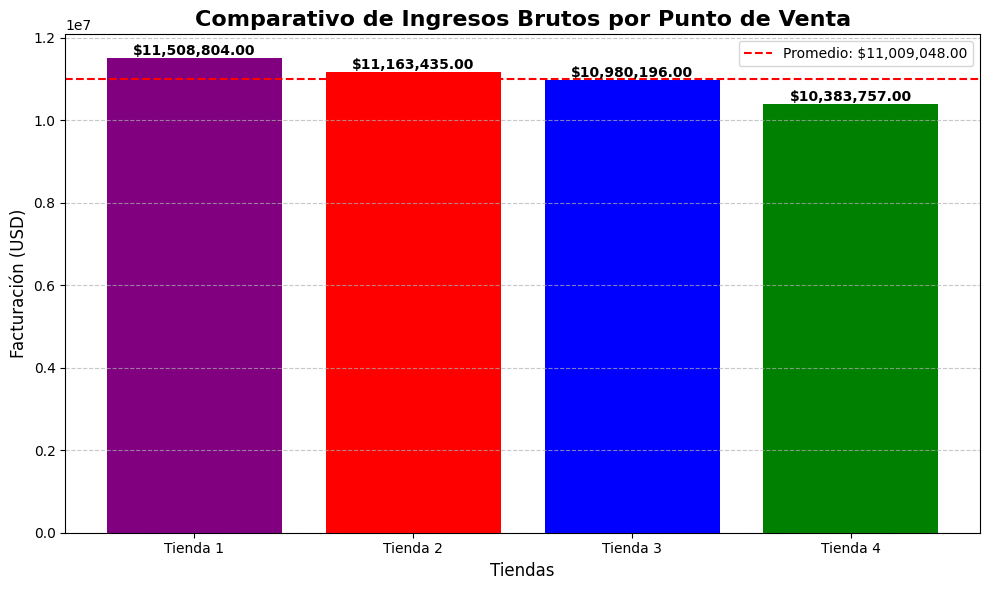

In [23]:
import matplotlib.pyplot as plt

facturaciones = [
facturacion_total_tienda,
facturacion_total_tienda2,
facturacion_total_tienda3,
facturacion_total_tienda4
]
nombres_tiendas = list(tiendas.keys())
#colores = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']
colores = ['purple', 'red', 'blue', 'green']
plt.figure(figsize=(10, 6))
barras = plt.bar(nombres_tiendas, facturaciones, color=colores)
# Título más ejecutivo
plt.title('Comparativo de Ingresos Brutos por Punto de Venta', fontsize=16,
fontweight='bold')
plt.ylabel('Facturación (USD)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Línea del promedio
promedio_facturacion = sum(facturaciones) / len(facturaciones)
plt.axhline(promedio_facturacion, color='red', linestyle='--', linewidth=1.5,
label=f'Promedio: ${promedio_facturacion:,.2f}')
plt.legend()
# Etiquetas de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 100, f"${altura:,.2f}",
    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

#4 Análisis de las Categorías Más Relevantes por Volumen de Venta

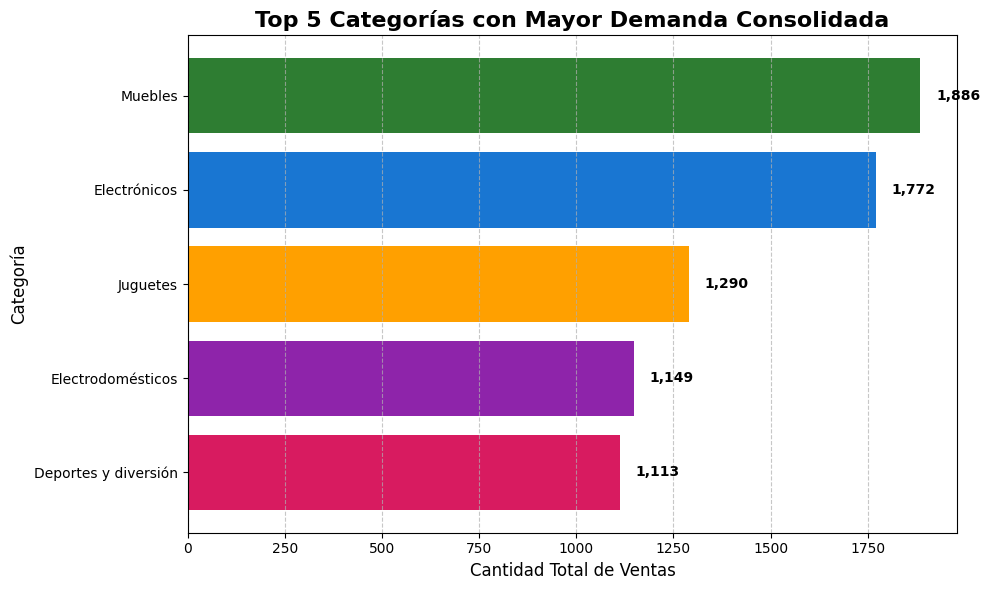

In [28]:
ventas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])
ventas_por_categoria = (
ventas_combinadas.groupby("Categoría del Producto")
.size()
.reset_index(name="Total Ventas")
.sort_values(by="Total Ventas", ascending=False)
)
top5_categorias = ventas_por_categoria.head(5)
plt.figure(figsize=(10, 6))
colors = ['#2E7D32', '#1976D2', '#FFA000', '#8E24AA', '#D81B60']
barras = plt.barh(
top5_categorias["Categoría del Producto"],
top5_categorias["Total Ventas"],
color=colors
)
plt.title("Top 5 Categorías con Mayor Demanda Consolidada", fontsize=16,
fontweight='bold')
plt.xlabel("Cantidad Total de Ventas", fontsize=12)
plt.ylabel("Categoría", fontsize=12)
plt.gca().invert_yaxis() # Para mostrar la más vendida arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Etiquetas con formato profesional
for barra in barras:
    ancho = barra.get_width()
    plt.text(
    ancho + 40,
    barra.get_y() + barra.get_height() / 2,
    f"{int(ancho):,}",
    va='center',
    fontsize=10,
    fontweight='bold'
    )
plt.tight_layout()
plt.show()

#Costo promedio de envio por tienda

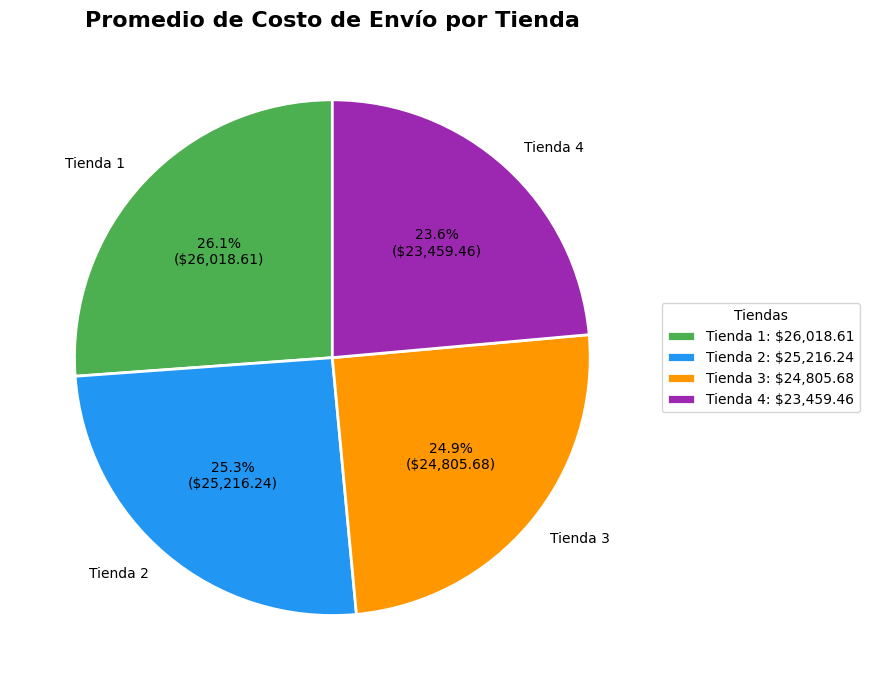

In [30]:
import matplotlib.pyplot as plt

tiendas = {
"Tienda 1": tienda,
"Tienda 2": tienda2,
"Tienda 3": tienda3,
"Tienda 4": tienda4
}
promedios_envio = {}
for nombre, df in tiendas.items():
    promedio = df['Costo de envío'].mean()
    promedios_envio[nombre] = promedio
df_promedios = pd.DataFrame.from_dict(promedios_envio, orient='index', columns=["Promedio Costo de Envío"])

plt.figure(figsize=(10, 7))
colores = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']
explode = [0, 0, 0, 0]

plt.pie(
    df_promedios["Promedio Costo de Envío"],
    labels=df_promedios.index,
    colors=colores,
    explode=explode,
    autopct=lambda p: f'{p:.1f}%\n(${p * sum(promedios_envio.values())/100:,.2f})',
    # Muestra porcentaje y valor absoluto
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.title("Promedio de Costo de Envío por Tienda", fontsize=16, fontweight='bold')
plt.legend(
    title="Tiendas",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    labels=[f"{label}: ${value:,.2f}" for label, value in zip(df_promedios.index, df_promedios["Promedio Costo de Envío"])]
)

plt.tight_layout()
plt.show()

5.1 Análisis Final Integrado

Metodología
Para obtener un diagnóstico riguroso, he construido un Índice de Desempeño Compuesto que
integra tres dimensiones clave:
• Utilidad neta (facturación total gasto total de envíos)
• Calificación promedio de clientes (escala 1–5)
• Eficiencia logística (utilidad neta ÷ número de envíos)
Cada métrica se normaliza entre 0 (peor desempeño) y 1 (mejor desempeño) mediante la fórmula:
xnorm =
x − xmin
xmax − xmin
y se pondera con los siguientes pesos:
12DimensiónPeso
Utilidad neta
Calificación de clientes
Eficiencia logística50 %
30 %
20 %
El índice final se calcula como:
Índice = 0.5 × unorm + 0.3 × rnorm + 0.2 × enorm
5.1.2
Resultados
Tienda
1
2
3
4
Utilidad neta (USD)CalificaciónUtilidad/Envío (USD)Índice Compuesto
11,447,426
11,103,950
10,921,679
10,328,4403.98
4.04
4.05
4.004,852
4,705
4,628
4,3790.70
0.74
0.67
0.09
• Tienda 2 logra el índice más alto (0.74), gracias a una combinación de alta rentabilidad,
excelente satisfacción y buena eficiencia.
• Tienda 1 le sigue de cerca (0.70), aunque su menor calificación (3.98) reduce ligeramente su
puntaje.
• Tienda 3 obtiene un desempeño sólido (0.67), especialmente fuerte en reseñas.
• Tienda 4 queda rezagada (0.09), mostrando la menor utilidad neta, eficiencia logística más
baja y una calificación promedio intermedia.

5.1.3
3. Conclusión y Recomendación

Este enfoque integrado revela que Tienda 4 es la menos eficiente ante los tres criterios estratégicos
(rentabilidad, experiencia de cliente y eficiencia). Por tanto, se recomienda vender la Tienda 4.

La liberación de este activo permitirá:

1. Reasignar capital a las tres tiendas restantes, donde los márgenes son más altos y la
satisfacción de clientes está mejor balanceada.
2. Potenciar el crecimiento de Tienda 2 y Tienda 1, que presentan los mejores resultados
integrales.
3. Minimizar riesgos operativos al enfocarse en los puntos de venta con mayor retorno y
mayor fidelidad de clientes.